In [50]:
import pandas as pd
import numpy as np
import sklearn.ensemble
import sklearn.neural_network
import sklearn.svm
import sklearn.naive_bayes
import sklearn.tree
import lime.lime_tabular_mod
import matplotlib.pyplot as plt
import doc.mod.utils.DatasetRepository as dr

import importlib
importlib.reload(lime.lime_tabular_mod)
repo = dr.DatasetRepository("../data")


pd.set_option("display.max_columns", None)
pd.set_option("mode.chained_assignment", None)
plt.style.use({"figure.facecolor": "white"})

### Load datasets

In [51]:
for dataset in repo.get_all_datasets():
    print(dataset.name)

titanic
fetal health
wines
mushrooms
heart disease


In [52]:
sample_dataset = repo.get_wines_dataset()
sample_dataset.train_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
172,8.0,0.420,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2
69,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5
203,7.0,0.420,0.35,1.6,0.088,16.0,39.0,0.99610,3.34,0.55,9.2
1280,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4
1295,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
...,...,...,...,...,...,...,...,...,...,...,...
224,8.4,0.635,0.36,2.0,0.089,15.0,55.0,0.99745,3.31,0.57,10.4
1377,5.2,0.490,0.26,2.3,0.090,23.0,74.0,0.99530,3.71,0.62,12.2
528,8.2,0.420,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7
1102,6.1,0.480,0.09,1.7,0.078,18.0,30.0,0.99402,3.45,0.54,11.2


## Check performance of different classifiers on selected dataset (with their default settings)

In [53]:
models = [
    ("Random Forest", sklearn.ensemble.RandomForestClassifier(n_jobs=-1)),
    ("AdaBoost", sklearn.ensemble.AdaBoostClassifier()),
    ("DecisionTree", sklearn.tree.DecisionTreeClassifier()),
    ("Neural Network", sklearn.neural_network.MLPClassifier()),
    ("SVM", sklearn.svm.LinearSVC()),
    ("Naive Bayes", sklearn.naive_bayes.GaussianNB()),
    ("kNN", sklearn.neighbors.KNeighborsClassifier())
]
precision_for_classifier = {}
recall_for_classifier = {}
f1_for_classifier = {}
for (classifier_name, model) in models:
    x = sample_dataset.train_data.to_numpy()
    y = sample_dataset.train_labels.to_numpy()
    model.fit(x, y)

    x = sample_dataset.test_data.to_numpy()
    y_true = sample_dataset.test_labels.to_numpy()
    y_predicted = model.predict(x)

    precision_for_classifier[classifier_name] = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_predicted, average="micro")
    recall_for_classifier[classifier_name] = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_predicted, average="micro")
    f1_for_classifier[classifier_name] = sklearn.metrics.f1_score(y_true=y_true, y_pred=y_predicted, average="micro")

c:\users\kamil zych\documents\mgr\lime\venv\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


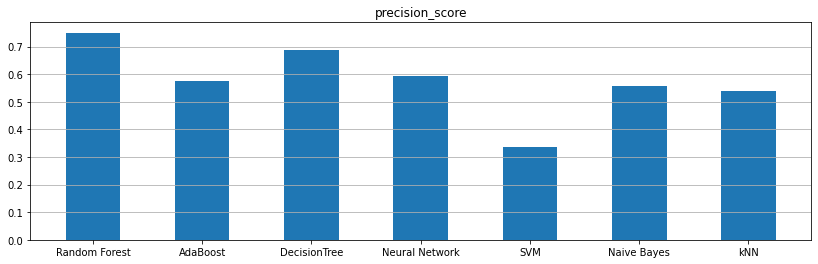

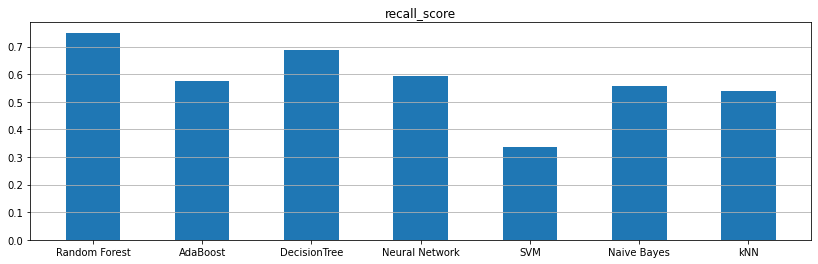

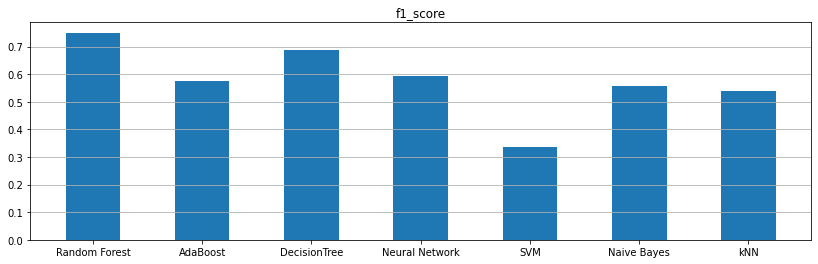

In [54]:
plt.figure(figsize=(14,4))
plt.bar(precision_for_classifier.keys(), precision_for_classifier.values(), width=0.5)
plt.title("precision_score")
plt.grid(axis="y")
plt.show()
plt.figure(figsize=(14,4))
plt.bar(recall_for_classifier.keys(), recall_for_classifier.values(), width=0.5)
plt.title("recall_score")
plt.grid(axis="y")
plt.show()
plt.figure(figsize=(14,4))
plt.bar(f1_for_classifier.keys(), f1_for_classifier.values(), width=0.5)
plt.title("f1_score")
plt.grid(axis="y")
plt.show()